In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/used-cars-listing-from-ebay/autos_new.csv


In [39]:
from matplotlib import pyplot as plt
import seaborn as sns
cars = pd.read_csv("/kaggle/input/used-cars-listing-from-ebay/autos_new.csv")
cars

,date_crawled,name,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen_online
0,2016-03-24,A5_Sportback_2.7_Tdi,18300,coupé,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,66954,2016-04-07
1,2016-03-14,"Jeep_Grand_Cherokee_""Overland""",9800,NaN,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,90480,2016-04-05
2,2016-03-17,GOLF_4_1_4__3TÜRER,1500,small car,2001,manuell,75,golf,150000,6,gasoline,volkswagen,nein,2016-03-17,91074,2016-03-17
3,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,3600,small car,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-04-06
4,2016-04-04,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,10,gasoline,bmw,ja,2016-04-04,33775,2016-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335106,2016-03-14,Suche_t4___vito_ab_6_sitze,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14,39576,2016-04-06
335107,2016-03-05,Smart_smart_leistungssteigerung_100ps,1199,convertible,2000,automatik,101,fortwo,125000,3,gasoline,smart,nein,2016-03-05,26135,2016-03-11
335108,2016-03-19,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439,2016-04-07
335109,2016-03-20,VW_Golf_Kombi_1_9l_TDI,3400,station wagon,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20,40764,2016-03-24


The granularity of this data is quite fine. Each entry in this table represents a used car listing, in addition to the various attributes for each car. Let's explore the distribution of used car prices in this dataset.

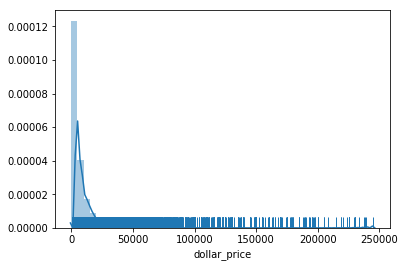

In [40]:
sns.distplot(cars['dollar_price'], bins = np.arange(0, 250000, 5000), rug = True)

Based on this used cars dataset, we can observe that the majority of used cars cost less than 50000. This is indicated by the high density of the rug plot for lower values of "dollar_price", and the tallest bar being around the 20000 value.

In [41]:
cars['vehicle_type'].value_counts()

limousine        89874
small car        68464
station wagon    63125
bus              29255
convertible      22201
coupé            17632
other             2828
Name: vehicle_type, dtype: int64

There are six categories of types of cars, thus vehicle_type is a qualitative nominal variable.

In [42]:
cars.loc[cars['gearbox'] == 'manuell', 'gearbox'] = 'manual'
cars.loc[cars['gearbox'] == 'automatik', 'gearbox'] = 'automatic'
cars['gearbox'].value_counts() 

manual       247351
automatic     74175
Name: gearbox, dtype: int64

In [43]:
cars['fuel_type'].value_counts()

gasoline                   200253
diesel                     105059
liquefied petroleum gas      5101
compressed natural gas        536
other                         128
Name: fuel_type, dtype: int64

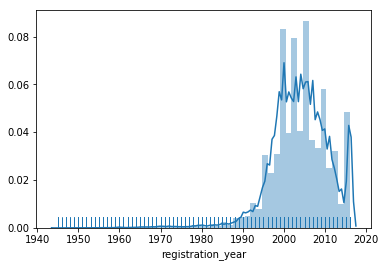

In [44]:
sns.distplot(cars['registration_year'],rug = True)

Based on this histogram, which is trimodal and skewed to lower registration years(to the left), indicates that Used Cars were registered between 1995 to 2018 mostly. 

In [45]:
cars.loc[cars['unrepaired_damage'] == 'ja', 'unrepaired_damage'] = 'yes'
cars.loc[cars['unrepaired_damage'] == 'nein', 'unrepaired_damage'] = 'no'
cars['unrepaired_damage'].value_counts() 

no     253186
yes     26594
Name: unrepaired_damage, dtype: int64

In [46]:
cars['brand'].value_counts()

volkswagen        71630
bmw               38034
mercedes_benz     34062
opel              33752
audi              31074
ford              21480
renault           15029
peugeot            9978
fiat               8133
seat               6272
skoda              5454
smart              5110
mazda              5075
citroen            4674
toyota             4548
nissan             4433
hyundai            3453
mini               3336
sonstige_autos     3068
volvo              3028
mitsubishi         2598
honda              2566
kia                2411
porsche            2106
suzuki             2097
alfa_romeo         2086
chevrolet          1770
chrysler           1294
dacia               887
jeep                773
land_rover          757
subaru              657
daihatsu            613
jaguar              598
saab                490
daewoo              417
lancia              395
trabant             390
rover               378
lada                205
Name: brand, dtype: int64

Volkswagen, BMW, and Mercedes seem to be the most common used car brands within this dataset, which we can use to safely deduce that this is a German dataset. 
Particularly, this is because of the use of words "ja" and "nein" meaning "yes" and "no" respectively in German in regards to whether the vehicle has unrepaired damage.

Let's explore the association between used car mileage and age of the car.

In [47]:
extract_year = lambda year: year[:4]
cars['year'] = cars['date_crawled'].apply(extract_year)
cars['year'] #All of these listings were added in the year 2016

0         2016
1         2016
2         2016
3         2016
4         2016
          ... 
335106    2016
335107    2016
335108    2016
335109    2016
335110    2016
Name: year, Length: 335111, dtype: object

In [48]:
cars['age'] = cars['year'].astype(int) - cars['registration_year']
cars['age']

0          5
1         12
2         15
3          8
4         21
          ..
335106    11
335107    16
335108    20
335109    14
335110     3
Name: age, Length: 335111, dtype: int64

Text(0, 0.5, 'percent per age(years)')

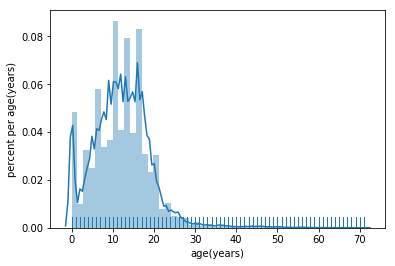

In [49]:
sns.distplot(cars['age'], rug = True)
plt.xlabel('age(years)')
plt.ylabel('percent per age(years)')

The average age of any given used car in this dataset(which is representative of the population of cars) is around 10 years old. This distribution is trimodal and skewed to the right(higher age numbers).

In [50]:
print("The average age of cars is", np.mean(cars['age']), "years old")
print("The range of car ages is", np.max(cars['age']) - np.min(cars['age']), 'years')

The average age of cars is 12.266851878929668 years old
The range of car ages is 71 years


Can age and mileage be useful features for predicting the price of used cars on average? Let's first explore the association between mileage and age.

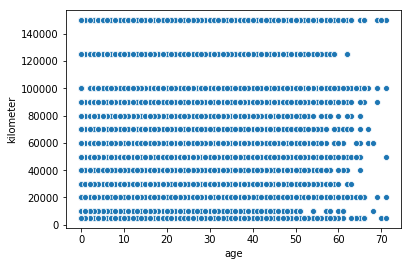

In [51]:
sns.scatterplot('age', 'kilometer', data = cars)

There appears to be no association whatsoever between age and mileage.

In [52]:
cars.head()

,date_crawled,name,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen_online,year,age
0,2016-03-24,A5_Sportback_2.7_Tdi,18300,coupé,2011,manual,190,NaN,125000,5,diesel,audi,yes,2016-03-24,66954,2016-04-07,2016,5
1,2016-03-14,"Jeep_Grand_Cherokee_""Overland""",9800,NaN,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,90480,2016-04-05,2016,12
2,2016-03-17,GOLF_4_1_4__3TÜRER,1500,small car,2001,manual,75,golf,150000,6,gasoline,volkswagen,no,2016-03-17,91074,2016-03-17,2016,15
3,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,3600,small car,2008,manual,69,fabia,90000,7,diesel,skoda,no,2016-03-31,60437,2016-04-06,2016,8
4,2016-04-04,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manual,102,3er,150000,10,gasoline,bmw,yes,2016-04-04,33775,2016-04-06,2016,21


Is age of the car associated with dollar price?

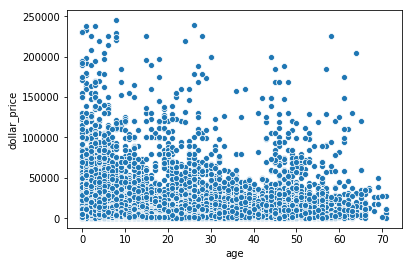

In [53]:
sns.scatterplot('age', 'dollar_price', data = cars) #No association here either. 

What is the average price per type of car?

In [54]:
vehicle_type_avg_dollar_price = cars[['vehicle_type', 'dollar_price']].groupby('vehicle_type', as_index = False).agg(np.mean)
vehicle_type_avg_dollar_price

,vehicle_type,dollar_price
0,bus,6836.772894
1,convertible,10696.569028
2,coupé,11841.859914
3,limousine,6215.195908
4,other,4753.824257
5,small car,3151.976280
6,station wagon,6085.864111


On average, used coupes and convertibles are more expensive.

In [55]:
bus = cars[cars['vehicle_type'] == 'bus']
convertible = cars[cars['vehicle_type'] == 'convertible']
coupe = cars[cars['vehicle_type'] == 'coupé']
limousine = cars[cars['vehicle_type'] == 'limousine']
small_car = cars[cars['vehicle_type'] == 'small car']
station_wagon = cars[cars['vehicle_type'] == 'station wagon']

In [56]:
bus.head()

,date_crawled,name,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen_online,year,age
6,2016-04-04,Ford_C___Max_Titanium_1_0_L_EcoBoost,14500,bus,2014,manual,125,c_max,30000,8,gasoline,ford,NaN,2016-04-04,94505,2016-04-04,2016,2
14,2016-03-23,Ford_C_MAX_2.0_TDCi_DPF_Titanium,7550,bus,2007,manual,136,c_max,150000,6,diesel,ford,no,2016-03-23,88361,2016-04-05,2016,9
15,2016-04-01,Mercedes_Benz_A_160_Classic_Klima,1850,bus,2004,manual,102,a_klasse,150000,1,gasoline,mercedes_benz,no,2016-04-01,49565,2016-04-05,2016,12
23,2016-03-09,Volkswagen_T3_andere,1990,bus,1981,manual,50,transporter,5000,1,gasoline,volkswagen,no,2016-03-09,87471,2016-03-10,2016,35
32,2016-03-25,Mercedes_Camper_D407,1500,bus,1984,manual,70,andere,150000,8,diesel,mercedes_benz,no,2016-03-25,22767,2016-03-27,2016,32


In [57]:
convertible.head()

,date_crawled,name,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen_online,year,age
5,2016-04-01,Peugeot_206_CC_110_Platinum,2200,convertible,2004,manual,109,2_reihe,150000,8,gasoline,peugeot,no,2016-04-01,67112,2016-04-05,2016,12
42,2016-03-30,BMW_120i_Cabrio_mit_M_Paket,14800,convertible,2008,manual,170,1er,125000,4,gasoline,bmw,NaN,2016-03-30,48691,2016-04-07,2016,8
49,2016-03-22,Smart_Cabrio_TÜV_bis_07/17,3000,convertible,2006,automatic,61,fortwo,80000,1,gasoline,smart,no,2016-03-22,12055,2016-03-22,2016,10
55,2016-03-07,BMW_325_i_Cabrio_wenig_Kilometer,14999,convertible,2007,manual,218,3er,50000,8,gasoline,bmw,no,2016-03-07,1129,2016-03-15,2016,9
96,2016-03-26,Opel_Astra_Twin_Top_2.0_Turbo,8599,convertible,2006,manual,200,astra,125000,9,gasoline,opel,no,2016-03-26,79761,2016-04-06,2016,10


In [58]:
coupe.head()

,date_crawled,name,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen_online,year,age
0,2016-03-24,A5_Sportback_2.7_Tdi,18300,coupé,2011,manual,190,NaN,125000,5,diesel,audi,yes,2016-03-24,66954,2016-04-07,2016,5
16,2016-04-01,Volkswagen_Scirocco_1.4_TSI_Sport,10400,coupé,2009,manual,160,scirocco,100000,4,gasoline,volkswagen,no,2016-04-01,75365,2016-04-05,2016,7
48,2016-03-21,BMW_435i_Sport_coupe,39600,coupé,2014,automatic,306,andere,30000,7,gasoline,bmw,no,2016-03-21,10435,2016-04-03,2016,2
57,2016-03-15,Volkswagen_Scirocco_1.4_TSI___Top_Zustand_!!!!,9700,coupé,2008,manual,160,scirocco,150000,8,gasoline,volkswagen,no,2016-03-15,55218,2016-04-06,2016,8
60,2016-04-01,Opel_astra_g_coupe_1.8_liter_benziner,1200,coupé,2001,NaN,0,astra,150000,0,NaN,opel,NaN,2016-04-01,47249,2016-04-07,2016,15


In [59]:
limousine.head()

,date_crawled,name,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen_online,year,age
4,2016-04-04,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manual,102,3er,150000,10,gasoline,bmw,yes,2016-04-04,33775,2016-04-06,2016,21
8,2016-03-26,Mazda_3_1.6_Sport,2000,limousine,2004,manual,105,3_reihe,150000,12,gasoline,mazda,no,2016-03-26,96224,2016-04-06,2016,12
17,2016-03-27,BMW_530i_TÜV_7/17_Scheckheftgepflegt_sehr_gute...,3699,limousine,2002,automatic,231,5er,150000,7,gasoline,bmw,no,2016-03-27,68309,2016-04-07,2016,14
19,2016-03-13,MERCEDES_200E__TÜV_04/2016,500,limousine,1990,manual,118,andere,150000,10,gasoline,mercedes_benz,yes,2016-03-13,35390,2016-03-13,2016,26
22,2016-03-07,Honda_Civic_1.4_i_VTEC_Comfort,6900,limousine,2008,manual,99,civic,60000,11,gasoline,honda,no,2016-03-07,12621,2016-03-26,2016,8


In [60]:
small_car.head()

,date_crawled,name,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen_online,year,age
2,2016-03-17,GOLF_4_1_4__3TÜRER,1500,small car,2001,manual,75,golf,150000,6,gasoline,volkswagen,no,2016-03-17,91074,2016-03-17,2016,15
3,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,3600,small car,2008,manual,69,fabia,90000,7,diesel,skoda,no,2016-03-31,60437,2016-04-06,2016,8
7,2016-03-17,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,999,small car,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17,27472,2016-03-31,2016,18
13,2016-03-20,Renault_Twingo_1.2_16V_Aut.,1750,small car,2004,automatic,75,twingo,150000,2,gasoline,renault,no,2016-03-20,65599,2016-04-06,2016,12
24,2016-03-08,Fiat_Punto_1.2,690,small car,2003,manual,60,punto,150000,3,gasoline,fiat,no,2016-03-08,86199,2016-03-09,2016,13


In [61]:
station_wagon.head()

,date_crawled,name,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen_online,year,age
9,2016-04-07,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,2799,station wagon,2005,manual,140,passat,150000,12,diesel,volkswagen,yes,2016-04-07,57290,2016-04-07,2016,11
10,2016-03-15,"VW_Passat_Facelift_35i__""7Sitzer""",999,station wagon,1995,manual,115,passat,150000,11,gasoline,volkswagen,NaN,2016-03-15,37269,2016-04-01,2016,21
11,2016-03-21,VW_PASSAT_1.9_TDI_131_PS_LEDER,2500,station wagon,2004,manual,131,passat,150000,2,NaN,volkswagen,no,2016-03-21,90762,2016-03-23,2016,12
20,2016-03-18,BMW_530d_touring_Vollausstattung_NAVI,2500,station wagon,2002,automatic,193,5er,150000,9,diesel,bmw,yes,2016-03-18,73765,2016-03-18,2016,14
39,2016-04-04,BMW_528i_touring,2100,station wagon,1998,automatic,193,5er,150000,2,gasoline,bmw,no,2016-04-03,86157,2016-04-06,2016,18


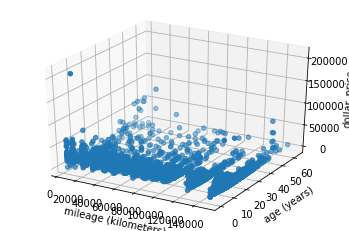

In [62]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bus['kilometer'], bus['age'], bus['dollar_price'])

ax.set_xlabel('mileage (kilometers)')
ax.set_ylabel('age (years)')
ax.set_zlabel('dollar_price')

plt.show()

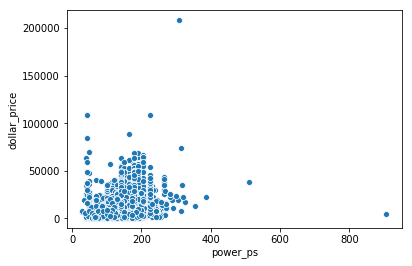

In [63]:
bus_rm = bus[(bus['power_ps'] < 1000) & (bus['power_ps'] > 20)]
sns.scatterplot(bus_rm['power_ps'], bus_rm['dollar_price'])

There appears to be a moderate linear association between power_ps(the explanatory variable) and dollar_price(the response variable). 

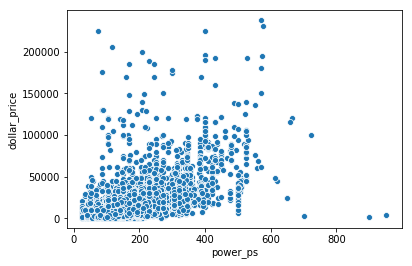

In [64]:
convertible_rm = convertible[(convertible['power_ps'] < 1000) & (convertible['power_ps'] > 20)]
sns.scatterplot(convertible_rm['power_ps'], convertible_rm['dollar_price'])

There appears to be a moderate linear association between power_ps(the explanatory variable) and dollar_price(the response variable).

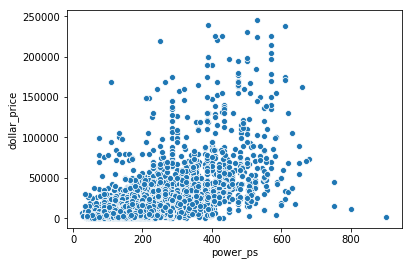

In [65]:
coupe_rm = coupe[(coupe['power_ps'] < 1000) & (coupe['power_ps'] > 20)]
sns.scatterplot(coupe_rm['power_ps'], coupe_rm['dollar_price'])

There appears to be a moderate linear association between power_ps(the explanatory variable) and dollar_price(the response variable).

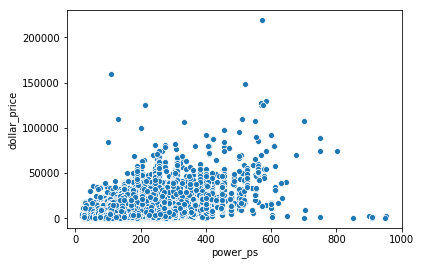

In [66]:
limousine_rm = limousine[(limousine['power_ps'] < 1000) & (limousine['power_ps'] > 20)]
sns.scatterplot(limousine_rm['power_ps'], limousine_rm['dollar_price'])

There appears to be a moderate linear association between power_ps(the explanatory variable) and dollar_price(the response variable).

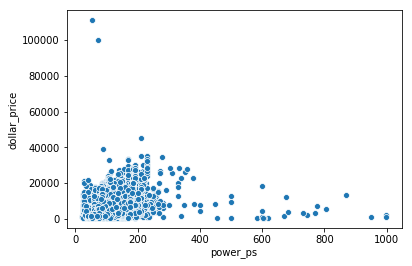

In [67]:
small_car_rm = small_car[(small_car['power_ps'] < 1000) & (small_car['power_ps'] > 20)]
sns.scatterplot(small_car_rm['power_ps'], small_car_rm['dollar_price'])

There appears to be a weak linear association between power_ps(the explanatory variable) and dollar_price(the response variable).

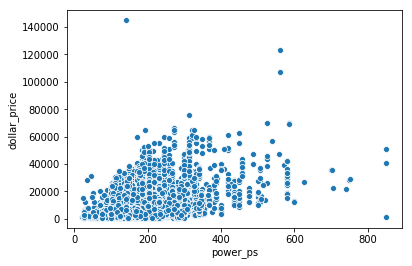

In [68]:
station_wagon_rm = station_wagon[(station_wagon['power_ps'] < 1000) & (station_wagon['power_ps'] > 20)]
sns.scatterplot(station_wagon_rm['power_ps'], station_wagon_rm['dollar_price'])

There appears to be a moderate linear association between power_ps(the explanatory variable) and dollar_price(the response variable).

Predicting Prices of bus

In [69]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = bus[['power_ps']]
y = bus['dollar_price']
bus_price_predictions = LinearRegression().fit(X, y)
y_pred = bus_price_predictions.predict(X)
print(np.sqrt(r2_score(y, y_pred)))
mean_squared_error(y, y_pred)

0.09101407058264216


50327433.436677456

Predicting Prices of convertible

In [70]:
X = convertible[['power_ps']]
y = convertible['dollar_price']
convertible_price_predictions = LinearRegression().fit(X, y)
y_pred = convertible_price_predictions.predict(X)
print(np.sqrt(r2_score(y, y_pred)))
mean_squared_error(y, y_pred)

0.24530762265531234


184451227.12297285

Predicting Prices of coupe

In [71]:
X = coupe[['power_ps']]
y = coupe['dollar_price']
coupe_price_predictions = LinearRegression().fit(X, y)
y_pred = coupe_price_predictions.predict(X)
print(np.sqrt(r2_score(y, y_pred)))
mean_squared_error(y, y_pred)

0.24084854775816128


299474131.2235414

Predicting Prices of limousine

In [72]:
X = limousine[['power_ps']]
y = limousine['dollar_price']
limousine_price_predictions = LinearRegression().fit(X, y)
y_pred = limousine_price_predictions.predict(X)
print(np.sqrt(r2_score(y, y_pred)))
mean_squared_error(y, y_pred)

0.193972549175888


50539309.4959242

Predicting Prices of small_car

In [73]:
X = small_car[['power_ps']]
y = small_car['dollar_price']
small_car_price_predictions = LinearRegression().fit(X, y)
y_pred = small_car_price_predictions.predict(X)
print(np.sqrt(r2_score(y, y_pred)))
mean_squared_error(y, y_pred)

0.09666884512385036


10891837.58568474

Predicting Prices of station_wagon

In [74]:
X = station_wagon[['power_ps']]
y = station_wagon['dollar_price']
station_wagon_price_predictions = LinearRegression().fit(X, y)
y_pred = station_wagon_price_predictions.predict(X)
print(np.sqrt(r2_score(y, y_pred)))
mean_squared_error(y, y_pred)

0.10917820892627267


41422791.217728265